In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

<h1>Dimensionality Reduction Regression</h1>

In [3]:
mpg_data = pd.read_fwf("data/autompg/auto-mpg.data", header = None, na_vals = ["?"])
mpg_data.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
mpg_data = mpg_data.drop(mpg_data[mpg_data.horsepower == "?"].index)
mpg_data.horsepower = mpg_data.horsepower.astype(float)

In [4]:
mpg_data_with_car_name = mpg_data.copy()
mpg_data_with_car_name = pd.get_dummies(mpg_data_with_car_name)

mpg_data = mpg_data.drop("car name", axis = 1)

In [5]:
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [6]:
mpg_data_with_car_name

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,"car name_""amc ambassador brougham""","car name_""amc ambassador dpl""",...,"car name_""volvo 145e (sw)""","car name_""volvo 244dl""","car name_""volvo 245""","car name_""volvo 264gl""","car name_""volvo diesel""","car name_""vw dasher (diesel)""","car name_""vw pickup""","car name_""vw rabbit c (diesel)""","car name_""vw rabbit custom""","car name_""vw rabbit"""
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0,0,...,0,0,0,0,0,0,1,0,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mpg_data_attributes = mpg_data.drop("mpg", axis = 1)
mpg_data_target = mpg_data["mpg"]

In [8]:
mpg_data_attributes

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


In [9]:
mpg_data_attributes.corr()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [10]:
pca = PCA()

In [11]:
pca.fit(mpg_data_attributes)

PCA()

In [12]:
pca.components_

array([[ 1.79262233e-03,  1.14341275e-01,  3.89670355e-02,
         9.92673415e-01, -1.35283460e-03, -1.33684138e-03,
        -5.51538021e-04],
       [ 1.33244815e-02,  9.45778439e-01,  2.98248416e-01,
        -1.20752748e-01, -3.48258394e-02, -2.38516836e-02,
        -3.24298106e-03],
       [-7.29209804e-03, -3.03257047e-01,  9.48713803e-01,
        -2.45320521e-03, -7.70032425e-02, -4.28162289e-02,
         1.24643867e-02],
       [ 1.42837791e-03, -9.20994584e-03, -4.30779415e-02,
         1.48633490e-03,  5.95372077e-02, -9.97249604e-01,
        -1.94075866e-03],
       [-1.71683641e-02,  1.06092977e-02,  8.64404757e-02,
        -3.15267236e-03,  9.94496232e-01,  5.55064333e-02,
         2.65997449e-03],
       [ 2.85519196e-01,  2.34681580e-03, -9.42467988e-03,
         1.19678424e-04,  3.20939275e-03, -8.78813785e-04,
         9.58317990e-01],
       [ 9.58096063e-01, -1.61707371e-02,  7.42175636e-03,
        -2.91024612e-04,  1.66762346e-02,  2.75161323e-03,
        -2.8539377

In [13]:
np.sum(pca.explained_variance_ratio_)

1.0

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99756151, 0.9996243 , 0.99998025, 0.9999952 , 0.99999912,
       0.99999964, 1.        ])

In [15]:
pca = PCA(n_components = 2)
mpg_data_attributes_pca = pca.fit_transform(mpg_data_attributes)

In [16]:
pca.components_[0]

array([ 1.79262233e-03,  1.14341275e-01,  3.89670355e-02,  9.92673415e-01,
       -1.35283460e-03, -1.33684138e-03, -5.51538021e-04])

In [17]:
# pca.components_[0] = 1.79262233e-03 * cyl + 1.14341275e-01 * disp + 3.89670355e-02 * horsepower + ...

In [18]:
# Save the proportion by neighboors
isomap = Isomap(n_components = 2, n_neighbors = 50)

In [19]:
isomap.fit(mpg_data_attributes)

Isomap(n_neighbors=50)

In [20]:
isomap_coords = isomap.transform(mpg_data_attributes)

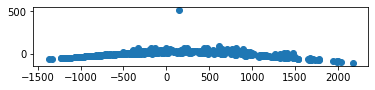

In [21]:
plt.scatter(isomap_coords[:, 0], isomap_coords[:, 1])
plt.gca().set_aspect("equal") # with that option we show that first dimension s more important than the second one
plt.show()

In [22]:
tsne = TSNE(init = "pca") # pca is only one dimensionality, random - gives data on many dimensions

In [23]:
mpg_data_tsne = tsne.fit_transform(mpg_data_attributes)

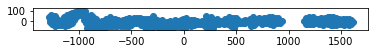

In [24]:
plt.scatter(mpg_data_tsne[:, 0], mpg_data_tsne[:, 1])
plt.gca().set_aspect("equal")
plt.show()